In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
toyota=pd.read_csv('ToyotaCorolla.csv')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
pd.set_option('max_column',None)

### Initial investigation

In [3]:
toyota.shape

(1436, 38)

In [4]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [5]:
toyota.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [6]:
toyota=toyota[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
toyota.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [7]:
toyota['Doors'].nunique()

4

### Model building

In [8]:
x=toyota.iloc[:,:8]
y=toyota['Price']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 8)
(288, 8)
(1148,)
(288,)


### Linear Regression

### Assumptions check

KeyboardInterrupt: 

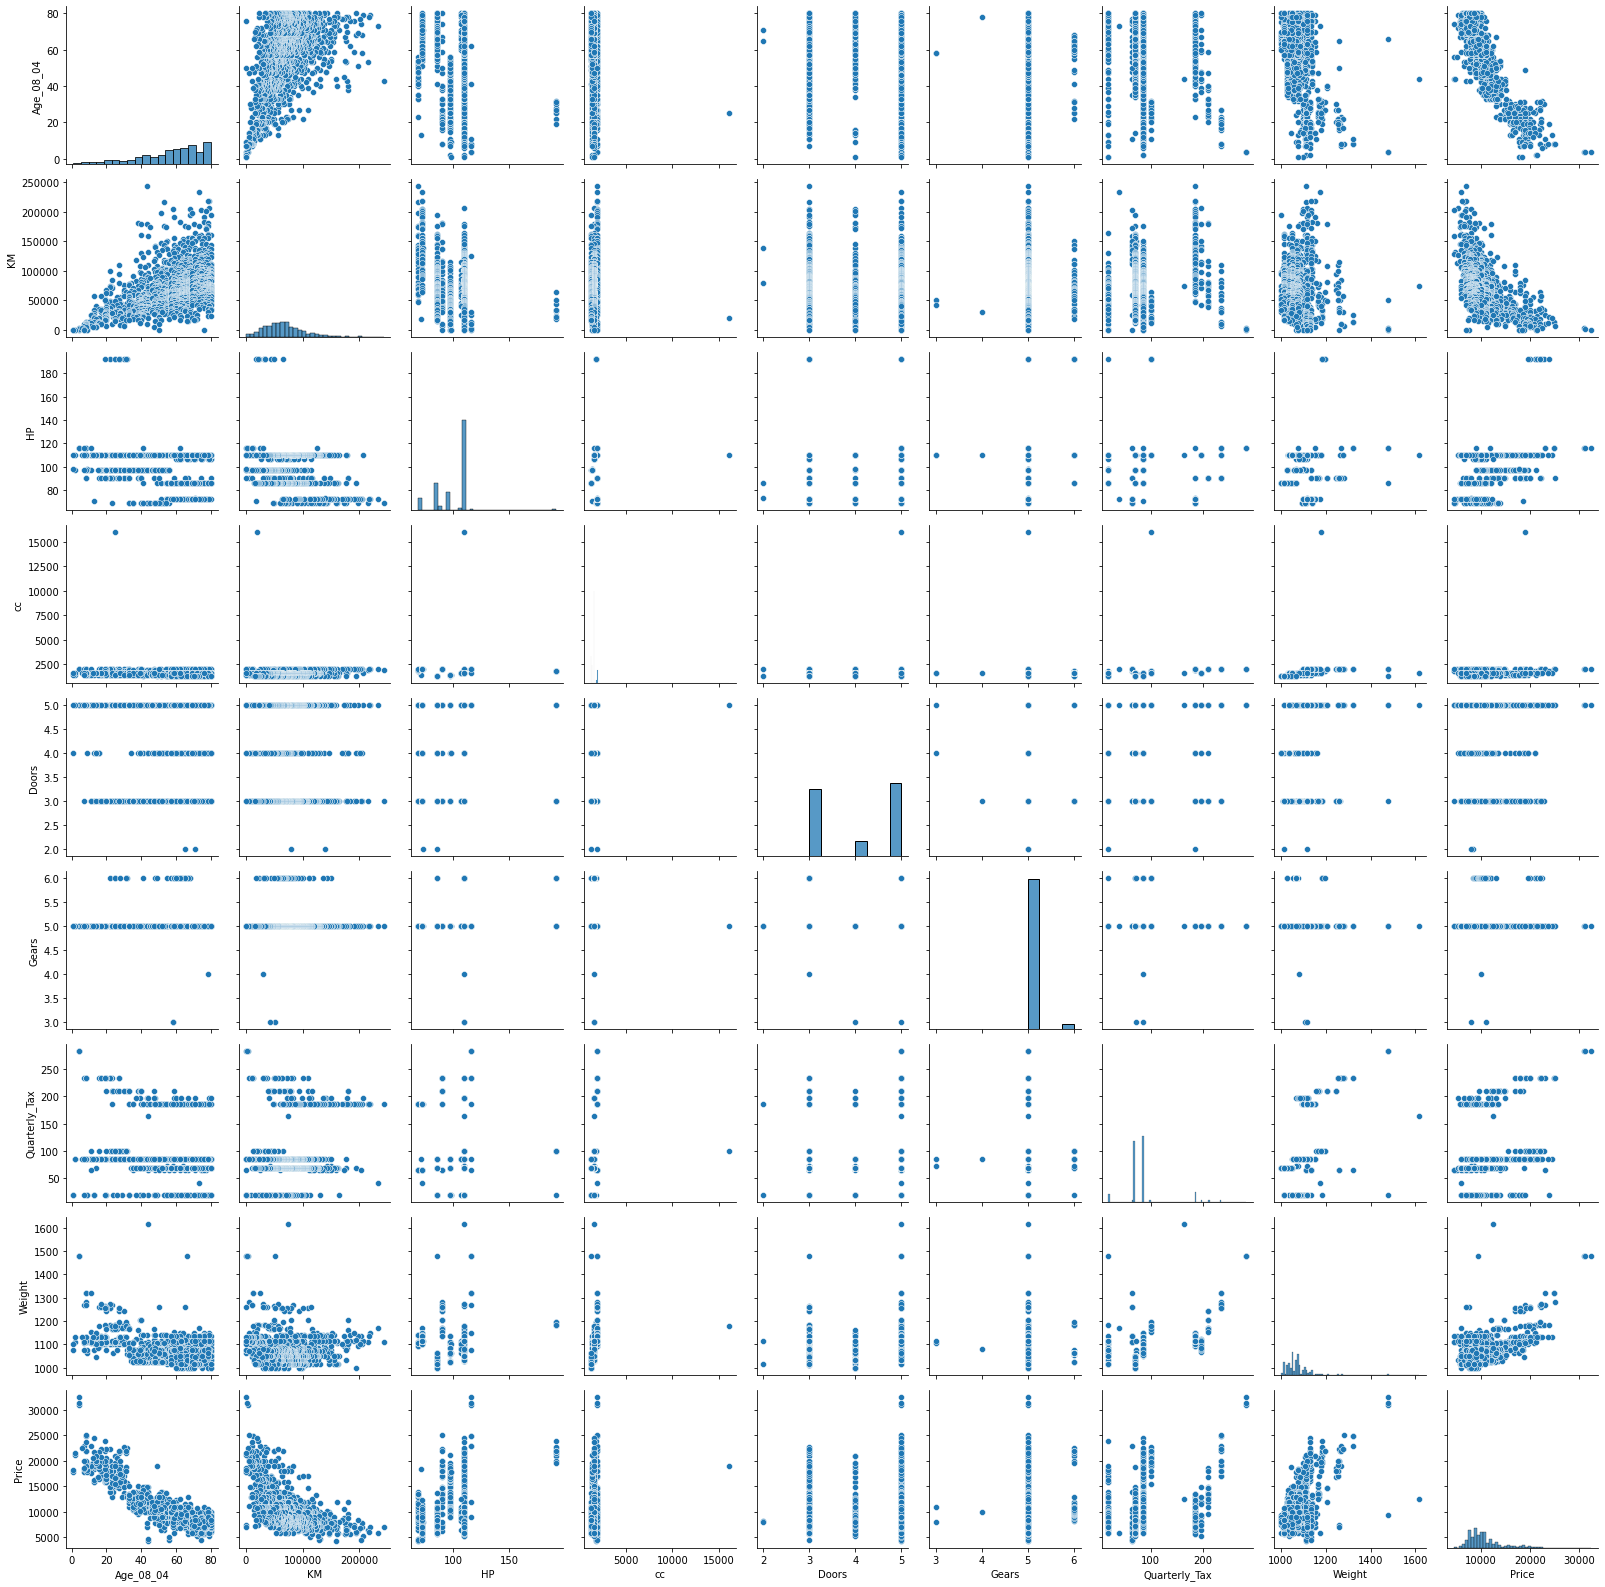

In [11]:
sns.pairplot(toyota)

In [ ]:
toyota.corr()

### Model training

In [13]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [14]:
linear_model.fit(x_train,y_train)

LinearRegression()

### Model testing

In [15]:
y_pred_train=linear_model.predict(x_train)
y_pred_test=linear_model.predict(x_test)

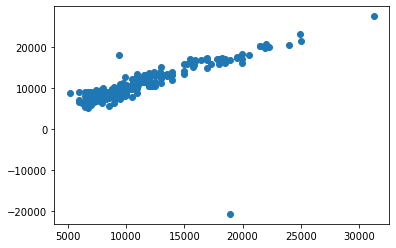

In [16]:
plt.scatter(y_test,y_pred_test)

### Model evaluation

In [13]:
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
print('Mean square error for train data: ',mean_squared_error(y_train,y_pred_train))
print('Mean square error for test data: ',mean_squared_error(y_test,y_pred_test))
print('R2 score for train data: ',r2_score(y_train,y_pred_train))
print('R2 score for test data: ',r2_score(y_test,y_pred_test))

Mean square error for train data:  1789193.5440554088
Mean square error for test data:  1843253.0295544553
R2 score for train data:  0.8621405710510645
R2 score for test data:  0.8663588451174249


### Model optimization

In [17]:
methods=(('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax'),
         ('Price ~ Age_08_04 + KM +HP + cc + Doors + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04 + KM +HP + Doors + Gears + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04 +HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
         ('Price ~ KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
         ('Price ~ Age_08_04'),('Price ~ KM'),('Price ~ HP'),('Price ~ cc'),('Price ~ Doors'),
         ('Price ~ Gears'),('Price ~ Quarterly_Tax'),('Price ~ Weight'))
         

In [18]:
import statsmodels.formula.api as smf

In [19]:
for model in methods:
    models=smf.ols(model,data=toyota).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is greater than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight
Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

pvalue is:
           index              0
0      Intercept   8.241949e-05
1      Age_08_04  3.354724e-288
2             KM   7.538439e-57
3             HP   3.757218e-28
4             cc   1.790902e-01
5          Doors   9.677716e-01
6          Gears   2.606549e-03
7  Quarterly_Tax   2.619148e-03
8         Weight   2.048576e-52

cc is an insignificant feature, since pvalue 0.17909018530670387 is greater than 0.05

Doors is an insignificant feature, since pvalue 0.9677716127461129 is greater than 0.05

aic value is:  24769.07664007625
rsqaure value is:  0.8637627463428192
_______________________________________________________________________

rsqaure value is:  0.3248545891553044
_____________________________________________________________________________________________________
Price ~ HP
Intercept    2990.276410
HP             76.259988
dtype: float64

pvalue is:
       index             0
0  Intercept  1.725695e-06
1         HP  1.926234e-34

aic value is:  27467.48640506685
rsqaure value is:  0.09921859277665879
_____________________________________________________________________________________________________
Price ~ cc
Intercept    9027.554784
cc              1.080168
dtype: float64

pvalue is:
       index              0
0  Intercept  1.766912e-112
1         cc   1.550808e-06

aic value is:  27594.41368349079
rsqaure value is:  0.01597422921332259
_____________________________________________________________________________________________________
Price ~ Doors
Intercept    7885.005835
Doors         705.558636
dtype: float64

pvalue is:
       index             0
0  Intercept  1.094732e-73
1      Doors  1.461237e-

Inference

The above result shows that when the model built separately by taking individual features, they contribute more toward the result

In most of the cases, insignificant/ non-important feature is Door, there contribution in model buliding is comparitively very less than other feature fallowed by cc

The model with comparitively less aic value and more r2 value is considered as a best model than other model

The model built by taking all the feature and the one built by dropping Door performes better than other model

### Calculating variance influence factor

In [20]:
req_age =smf.ols('Age_08_04 ~ KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_age=1/(1-req_age)

req_cc =smf.ols('cc ~ Age_08_04 + KM +HP + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_cc=1/(1-req_cc)

req_km =smf.ols('KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_km=1/(1-req_km)

req_hp =smf.ols('HP ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_hp=1/(1-req_hp)

req_door =smf.ols('Doors ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_door=1/(1-req_door)

req_quarterly=smf.ols('Quarterly_Tax ~ Age_08_04 + KM +HP + cc + Doors + Gears + Weight',data=toyota).fit().rsquared
vif_quarterly=1/(1-req_quarterly)

req_wt=smf.ols('Weight ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax ',data=toyota).fit().rsquared
vif_wt=1/(1-req_wt)

req_gear=smf.ols('Gears ~ Age_08_04 + KM +HP + cc + Doors + Quarterly_Tax + Weight ',data=toyota).fit().rsquared
vif_gear=1/(1-req_gear)

In [21]:
vif_table=pd.DataFrame({'variables':['age','km','hp','cc','door','gears','quaterly','weight'],
              'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_quarterly,vif_wt]})
vif_table

,variables,vif
0,age,1.884620
1,km,1.756905
2,hp,1.419422
3,cc,1.163894
4,door,1.156575
5,gears,1.098723
6,quaterly,2.311431
7,weight,2.516420


The variance influence factor for all the feature lies in the range of 0 to 3

Hence the features are moderately correlated

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [22]:
modelqq=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit()

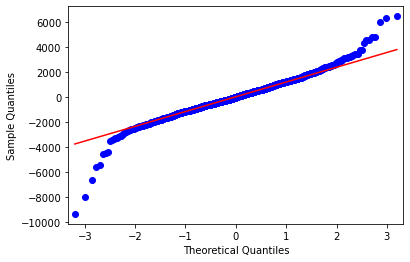

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelqq.resid,line='q')

The Q-Q plot significes that the data are moderately normally distributed with flat tails

In [24]:
list(np.where(modelqq.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [25]:
list(np.where(modelqq.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

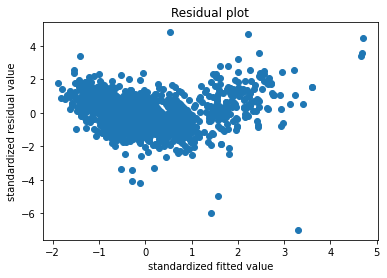

In [25]:
plt.scatter(get_standardized_values(modelqq.fittedvalues),get_standardized_values(modelqq.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')
plt.show()

## Residual Vs Regressors

Age_08_04


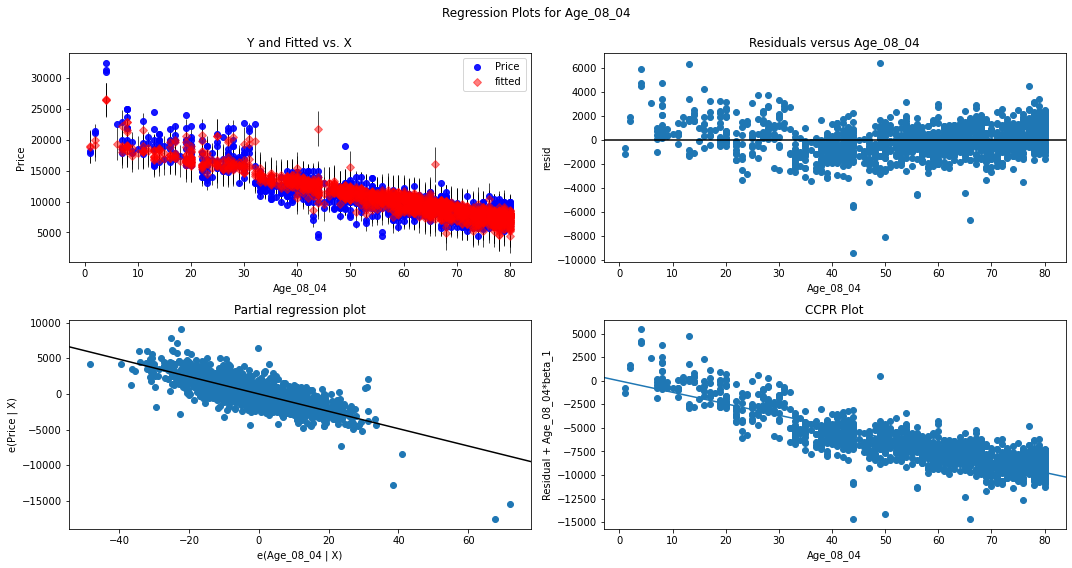

KM


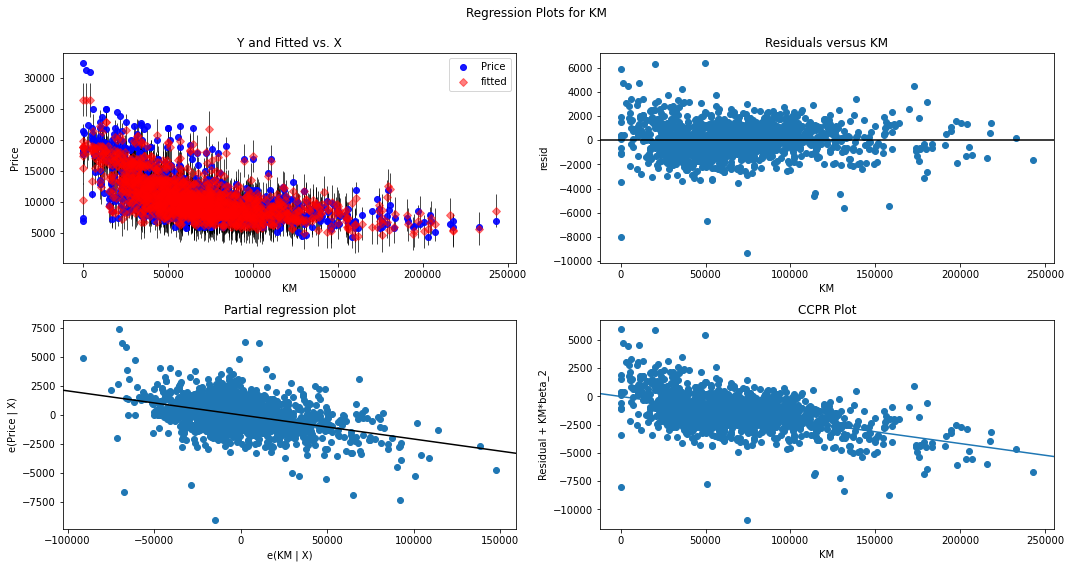

HP


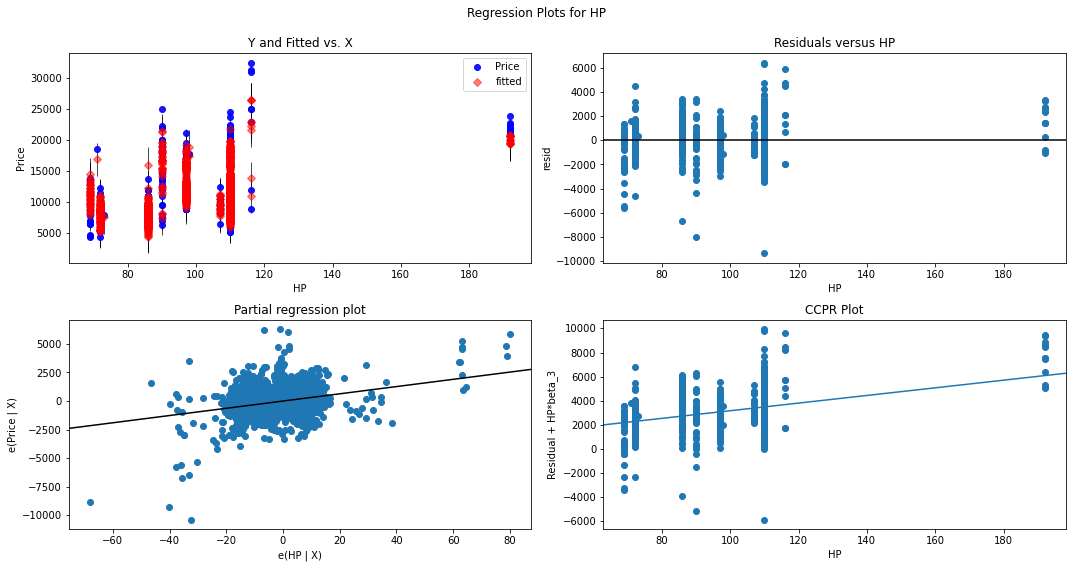

cc


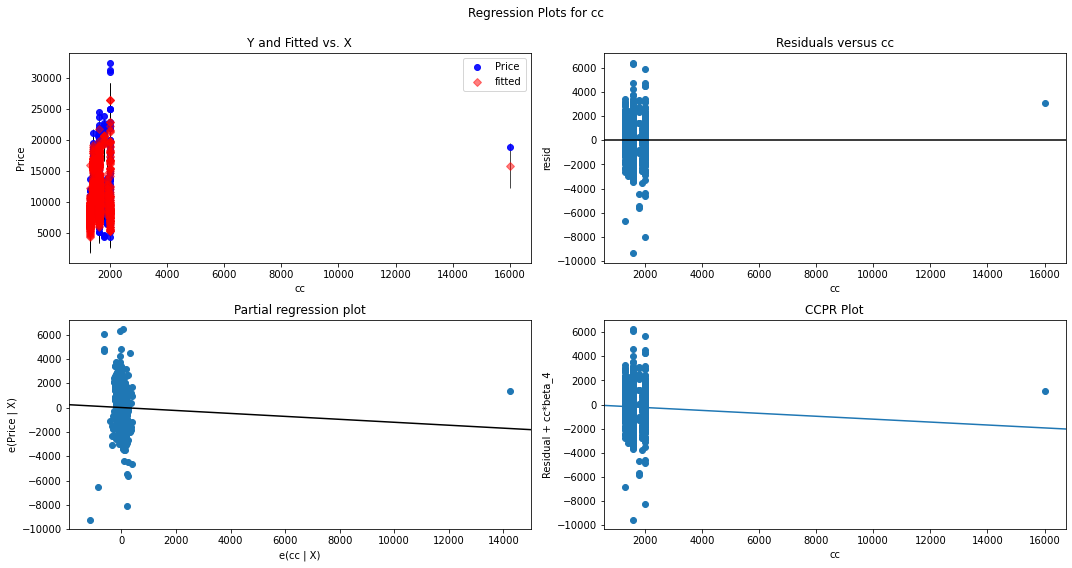

Doors


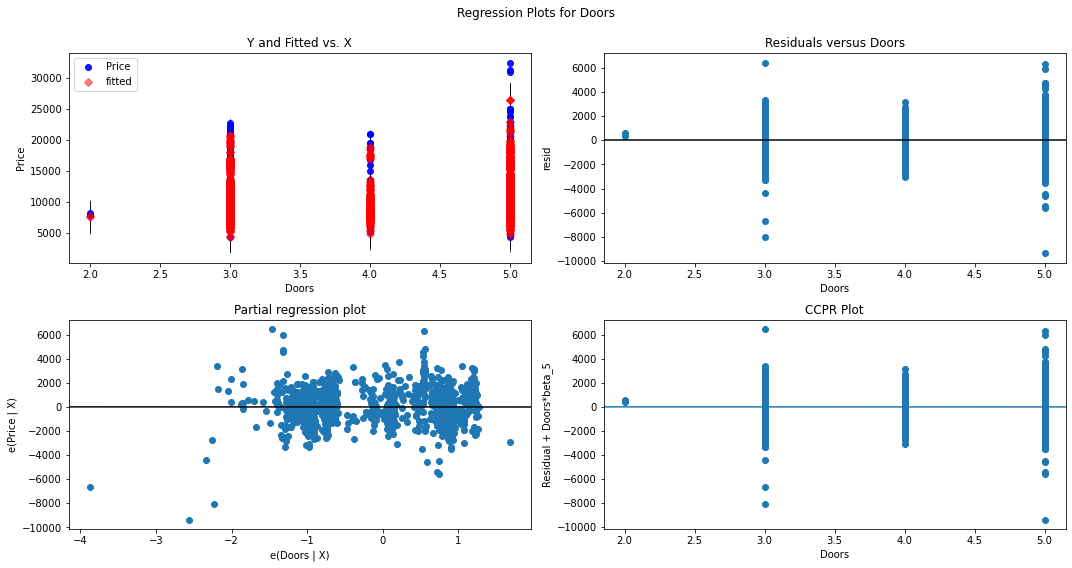

Gears


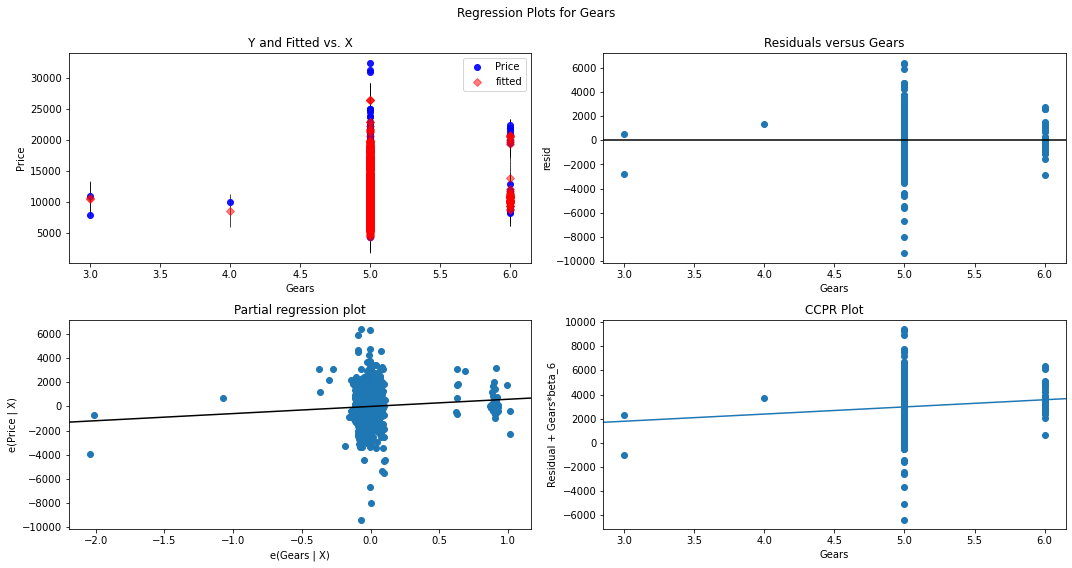

Quarterly_Tax


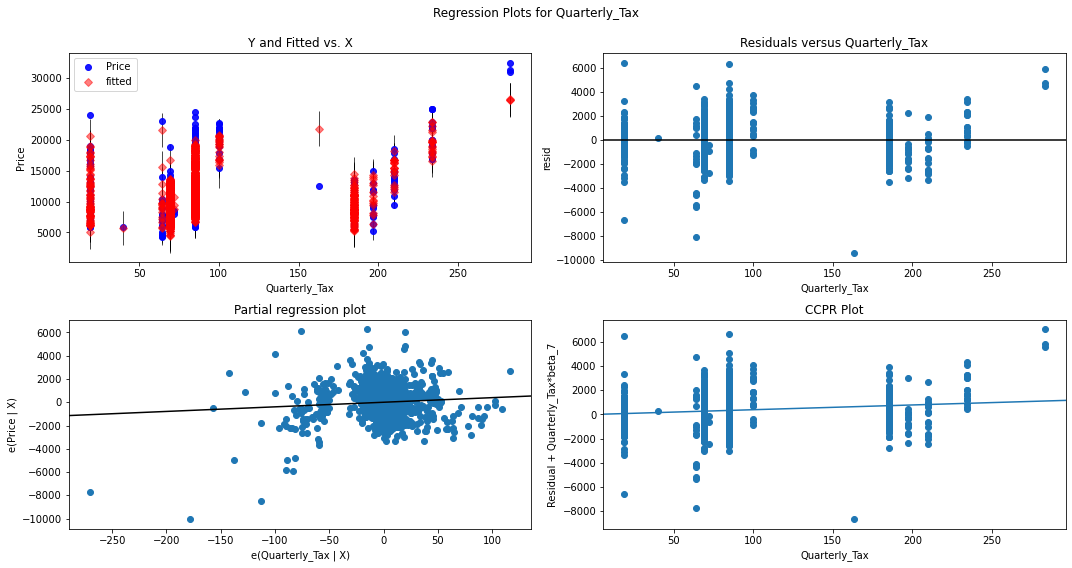

Weight


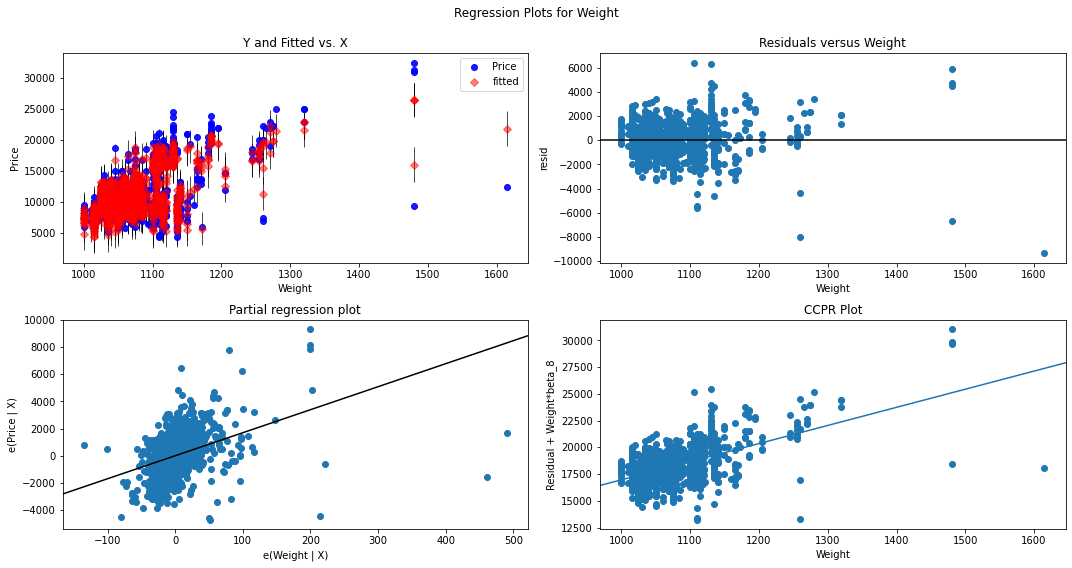

In [70]:
graphics=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
for i in graphics:
    print(i)
    fig=plt.figure(figsize=(15,8))
    fig=sm.graphics.plot_regress_exog(modelqq,i,fig=fig)
    plt.show()

## Model Deletion Diagnostics

### Detecting Influencers/Outliers

### Cook’s Distance

In [26]:
model_influence=modelqq.get_influence()
c,_=model_influence.cooks_distance

<StemContainer object of 3 artists>

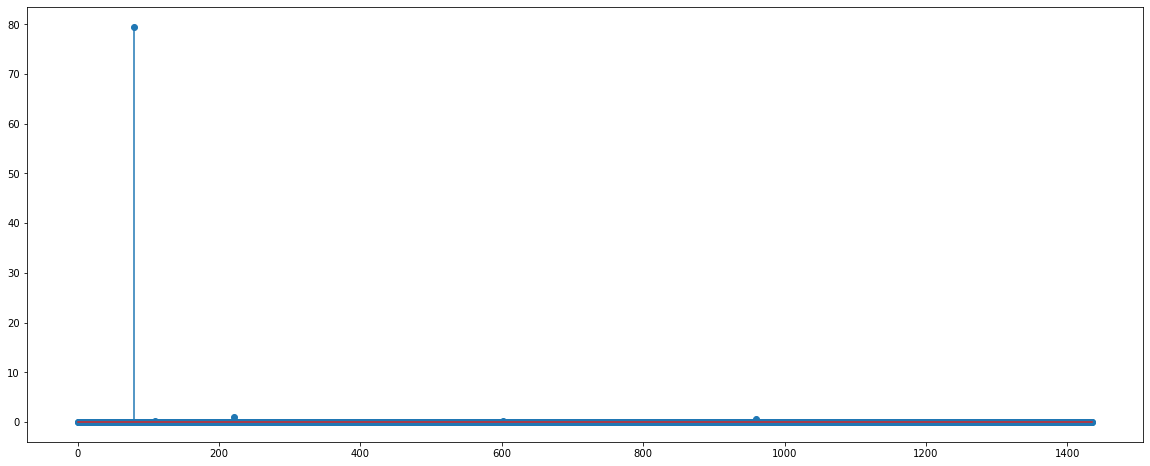

In [78]:
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(toyota)),np.round(c,3))

In [77]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

The cook's distance clearly shows that the point 80 is an outlier

### High influence point

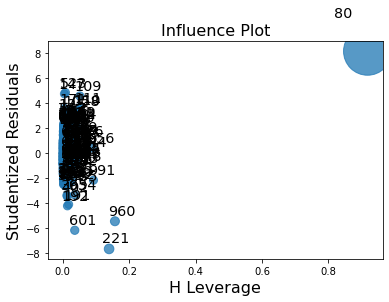

In [81]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelqq)
plt.show()

Here the data at point 80 have more influence over the result than other data

In [88]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k +1)/n)
leverage_cutoff

0.020891364902506964

### model optimization

In [26]:
toyota_new=toyota
toyota_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [27]:
toyota_new[toyota_new.index.isin([80])]
# droping highly influenced data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [28]:
toyota_new=toyota_new.drop(toyota_new.index[80]).reset_index()

In [29]:
toyota_new=toyota_new.drop(['index'],axis=1)
toyota_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500
1431,72,19000,86,1300,3,5,69,1015,10845
1432,71,17016,86,1300,3,5,69,1015,8500
1433,70,16916,86,1300,3,5,69,1015,7250


In [30]:
toyota_new[toyota_new.index.isin([80])]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,29,20000,110,1600,5,5,85,1115,17250


### Final model

In [31]:
model_final=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota_new).fit()

In [32]:
model_final.rsquared,model_final.aic

(0.8693790488655819, 24687.28102432684)

In [33]:
model_final_door=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight',data=toyota_new).fit()

In [34]:
model_final_door.rsquared,model_final_door.aic

(0.8693349475698542, 24685.765438793034)

Inference:

The final model is bulit after dropping the outlier

since,feature door doen't contribute more towards the result, the model built after dropping door performs better than considering all feature (aic value decreases)